##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 1 DO LABORATORIUM 1</style></h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</style></h1>
    <h1 style = "font-size:24px">Regresja liniowa i logistyczna</style></h1>
    <h1 style = "font-size:24px">Tomasz Neumann</style></h1>
    <h3 style = "font-size:21px">Zagadnienie regresji liniowej - przykłady</h3>
    <h3 style =
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 1

Regresja liniowa

Jest to podejście, które zakłada liniową zależność pomiędzy zmiennymi wejściowymi, a zmienną docelową. Najprostszym typem tego rodzaju regresji jest przyjęcie modelu z jedną zmienną wejściową $x$ i zmienna wyjściową $y$.  Celem modelu jest znalezienie parametrów funkcji, która na podstawie wartości $x_i$ będzie zwracała wartości $y_i$
$$y=a_0+a_1x,$$
gdzie $a_0$ to wyraz wolny (intercept), a współczynnik $a_1$ (slope), określa o ile zmienia się wartość $y_i$ wraz ze zmianą $x_i$. Uczenie takiego modelu polega na znalezieniu wystarczająco dobrego przybliżenia funkcji zmiennej wyjściowej do zmiennych wejściowych, odpowiadającej hipotezie bliskiej prawdziwej.
W celu zamodelowania takiej sytuacji wygenerujemy dane, które mogłyby opisywać zmianę położenia ciała w ruchu jednostajnie prostoliniowym. Na początku należy zaimportować biblioteki, które będą potrzebne do realizacji zadania.

In [ ]:
# Import podstawowych bibliotek języka Python
import numpy as np  # operacje numeryczne
import matplotlib  # wykresy i ich ustawienia
import matplotlib.pyplot as plt  # tworzenie wykresu
import time #diagnostyka czasu wykonywania operacji

W kolejnym kroku zakłada się współczynniki idealnego modelu oraz generuje się szum gaussowski imitujący zakłócenia o pewnej amplitudzie występujące podczas wykonywania pomiaru.

In [ ]:
# Załóżmy, że zjawisko które chcemy zamodelować opisywane jest następujacą zależnością liniową
# np. modelowanie zmiany położenia ciała w ruchu jednostajnie prostoliniowym
# y = 0.2* x  + 0.4 + noise
# noise jest czynnikiem zakłócającym pomiar

Wt = 0.2
bt = 0.4

# deklaracja liczby zmiennych używanych podczas generacji danych
n_samples = 100

# ustawienie wartości zaszumienia na wartość 0
noise = 0
# jeżeli jednak ma być ustawiona pewna wartość szumu z dowolną amplitudą, należy odkomentować poniższą linijkę kodu:
noise = np.random.rand(n_samples).astype(np.float32)/10

W tej części inicjowana jest zmienna niezależna oraz zmienna zależna oraz wyświetlone zostaną poglądowo wygenerowane wartości.

In [ ]:
# Generacja losowej zmiennej niezależnej x
x_t = np.random.rand(n_samples).astype(np.float32)

# posortowanie wygenerowanych wartości x w celu lepszej prezentacji danych na wykresach
x_training = np.sort(x_t)

# Wyliczenie wartości dla zmiennej zależnej y
y_training = Wt * x_training + bt + noise

# Diagnostyczne wyświetlenie wygenerowanych wartości
print("\n x_training =", x_training)
print("\n y_training =", y_training)
print("\n Noise std. dev. =", np.std(noise))


 x_training = [0.00283947 0.00457998 0.01546369 0.02182158 0.03083484 0.03704666
 0.04114839 0.04930746 0.07129359 0.0819637  0.0917322  0.10142118
 0.12035851 0.13322856 0.13758545 0.14953174 0.1617782  0.16609268
 0.1678385  0.16983493 0.19913456 0.2272445  0.23465791 0.23565106
 0.25011438 0.28095728 0.2921181  0.30730864 0.30877927 0.31893662
 0.32363787 0.3251242  0.32742724 0.33156377 0.33817878 0.35236156
 0.38523644 0.39369738 0.41291264 0.41506067 0.41857746 0.43712908
 0.43758515 0.4480318  0.45092186 0.48130742 0.4822533  0.499668
 0.50525814 0.50875926 0.51774526 0.5188394  0.5226047  0.5236936
 0.5339094  0.5402638  0.5483358  0.5522387  0.568977   0.58489126
 0.60313535 0.6146495  0.6151045  0.62646854 0.62853456 0.63351685
 0.63438976 0.6643046  0.678645   0.69144136 0.7025787  0.71264964
 0.71835905 0.71973705 0.72298545 0.7352903  0.73793614 0.74036187
 0.77542824 0.796461   0.80246323 0.815433   0.84649503 0.8505014
 0.85887456 0.86636657 0.87417656 0.87735575 0.8988

W tym kroku został zaprezentowany przykładowy kod umożliwiający wizualizację wygenerowanych danych w poprzednim punkcie.

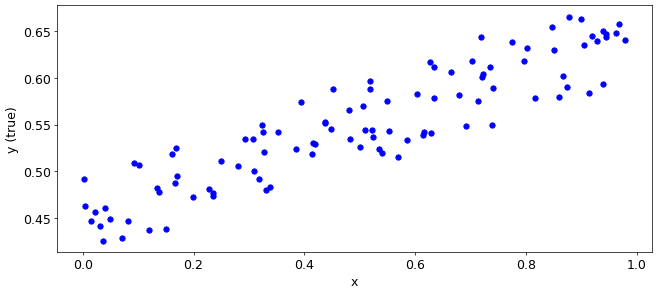

In [ ]:
# Wizualizacja wygenerowanych danych
# Ustawienia związane z wyświetlaniem
matplotlib.rcParams.update({'font.size': 14})
f = plt.figure(figsize=(12, 5), dpi=64)
f1 = f.add_subplot(111)
f1.set_xlabel('x')
f1.set_ylabel('y (true)')
# Wykreślenie danych
f1.plot(x_training, y_training, 'bo')
plt.show()

W postaci wektorowej, predykcja za pomocą modelu regresji liniowej może zostać zapisana jako
$$y=h_{\theta}(\mathbf{x}) = \mathbf{\theta}\cdot \mathbf{x}$$
gdzie $\mathbf{\theta}$ to wektor parametrów modelu (wraz z punktem obciążenia $\theta_0$ i $\theta_1, ... \theta_n$), $\mathbf{x}$ to wektor cech danego przykładu, zaś $h_{\theta}$ to funkcja hipotezy, wykorzystująca parametry $\mathbf{\theta}$ modelu.
Aby wyznaczyć parametry, które będą optymalnie dopasowane do danych zbioru uczącego należy zastosować miarę wydajności dla modelu regresyjnego, a tu najlepiej sprawdza się pierwiastek błędu średniokwadratowego RMSE. W praktyce łatwiej jest jednak minimalizować wartość błędu średniokwadratowego MSE, który można wyliczać jako
$$MSE(\mathbf{X}, h_{\theta}) = \dfrac{1}{m}\sum_{i=1}^{m} \big(\big|\mathbf{\theta}^T\mathbf{x}^{(i)}-y^{(i)}\big|\big)^2$$
Do określenia wartości wektora  $\mathbf{\theta}$ minimalizującego funkcję kosztu używa się jawnego rozwiązania w postaci równania normalnego
$$\hat{\mathbf{\theta}} = \big( \mathbf{X}^T X\big)^{-1}\cdot\mathbf{X}^T\cdot \mathbf{y},$$
gdzie $\hat{\mathbf{\theta}}$ oznacza wartość wektora $\mathbf{\theta}$ minimalizująca funkcję kosztu, zaś $\mathbf{y}$ jest wektorem wartości docelowych.
Poniższy fragment kodu przedstawia obliczenie wartości $\hat{\mathbf{\theta}}$ za pomocą równania normalnego.

In [ ]:
# Dodanie do każdej próbki x0=1
X_b = np.c_[np.ones((100, 1)), x_training]
start = time.time()
hat_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_training)
dt = time.time() - start;
print('Upłynęło ',dt*1000,' ms')
print(hat_theta)

Upłynęło  8.977890014648438  ms
[0.45100232 0.19811074]


gdzie pierwsza wartość z tablicy informuje nas o wartości wyrazu wolnego, a druga wartość niesie informację o współczynniku kierunkowym wyznaczonej prostej.
Na podstawie wyznaczonych wartości parametrów prostej można dokonać predykcji jak i wizualizację uzuskanych wyników na tle danych wejściowych.

[0.45100232 0.69864075]


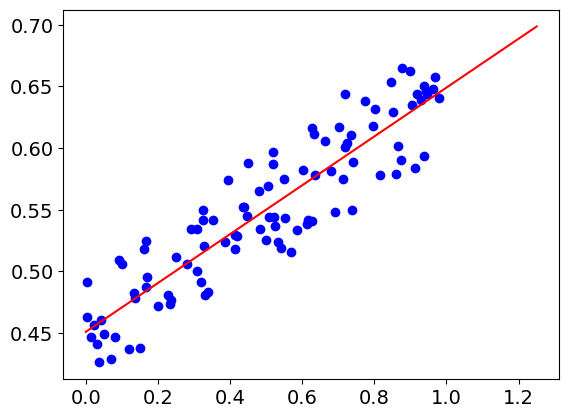

In [ ]:
# Wyliczenie prognozy na podstawie hat_theta
x_predict = np.array([[0], [1.25]])
x_predict_b = np.c_[np.ones((2,1)), x_predict]
y_predict = x_predict_b.dot(hat_theta)
print(y_predict)
# zilustrowanie rozwiązań na wykresie
plt.plot(x_training, y_training, "bo") #dane treningowe
plt.plot(x_predict, y_predict, "r") # dane z predykcji
plt.show()

Wykonanie tych samych operacji można wykonać za pomocą bibliteki Scikit-Learn wykorzystując klasę LinearRegression, która jest opisana w dokumentacji pod adresem https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Wywołanie modelu może odbywać się poprzez przedefiniowanie parametrów domyślnych takich jak:
- fit_intercept (domyślnie True), oblicza punkt przecięcia z osią. W przypadku ustawienia na False, oczekuje się, że dane będę wyśrodkowane.
- normalize (domyślnie False) dokonuje normalizacji danych wejściowych, gdy fit_intercept jest ustawiony na True, w przeciwnym razie jest ignorowany. Warto sprawdzić podczas testów, czy włączenie normalizacji poprawi ostatecznie wyniki końcowe.

Upłynęło  37.447452545166016  ms
[0.4510024] [[0.19811071]]


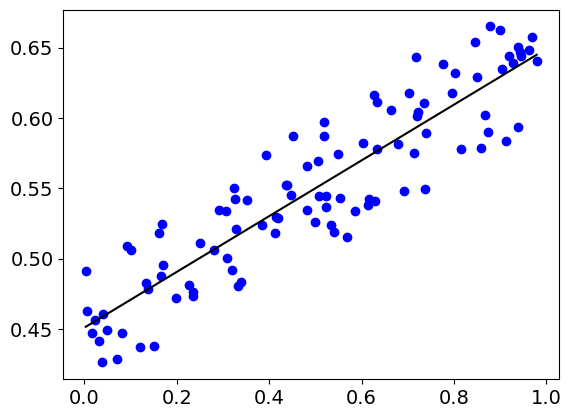

In [ ]:
from sklearn.linear_model import LinearRegression
#należy przygotować odpowiednio dane zgodnie z opisem
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lin_reg = LinearRegression() #można sprawdzić, czy wynik poprawi się przy zastosowaniu normalizacji normalize=True
X_c = x_training.reshape(100,1)
noise_c = noise.reshape(100,1)
y_c = 0.2*X_c+0.4+noise_c
start = time.time()
lin_reg.fit(X_c, y_c)
dt = time.time() - start;
print('Upłynęło ',dt*1000,' ms')
print(lin_reg.intercept_, lin_reg.coef_)
plt.plot(X_c, y_c, "bo") # dane treningowe
plt.plot(X_c, lin_reg.intercept_+lin_reg.coef_*X_c, "k") #wykres liniowy na podstawie wyliczonych współczynników
plt.show()

Wyświetlenie współczynników w tym przypadku odbyło się poprzez wywołanie atrybutu <i>coef_</i>, natomiast wyrazu wolnego za pomocą atrybutu <i>intercept_</i>.
Do wyliczenia prognozy można posłużyć się metodą metodą <i>predict</i> do której należy przekazać tablicę danych  próbek.

In [ ]:
print(lin_reg.predict(np.array([[0.5],[1],[100]])))

[[ 0.55005775]
 [ 0.6491131 ]
 [20.26207384]]


Dla modelu można wywołać metodę <i>score</i>, która zwraca wartość współczynnika determinacji <i>R</i>. Najlepszy wynik ma wartość 1.0 oraz może być ujemny (model może być arbitralnie gorszy). Model, który zawsze będzie przewidywał wartość oczekiwaną zmiennej zależnej, pomijając cechy wejściowe miałby wartość 0 dla współczynnika determinacji.

In [ ]:
print('R = ', lin_reg.score(X_c, y_c))

R =  0.8259732127189636


W kolejnym kroku wykorzystamy możliwości modułu <i>statsmodels</i>, który za pomocą metody najmniejszych kwadratów OLS umożliwia oszacowanie wartości parametrów modelu regresji (https://www.statsmodels.org/stable/regression.html). Oprócz zaimportowania odpowiedniego pakietu należy tu także prawidłowo przygotować i wywołać dane w metodzie uczącej. Użytkownik musi tu zadbać o uwzględnie punktu przecięcia (wyrazu wolnego, obciążenia) poprzez zastosowanie metody <i>add_constant</i>. Także przy wywołaniu metody OLS należy pamietać, że pierwszym parametrem jest tablica ze zmienną niezależną, jako druga jest podawana tablica $n\times k$ z liczbą obserwacji <i>n</i> i regresorów <i>k</i>.   

In [ ]:
import statsmodels.api as sm
X_d = x_training.reshape(100,1)

noise_d = noise.reshape(100,1)
y_d = 0.2*X_d+0.4+noise_d

X_d = sm.add_constant(X_d, prepend=False)
mod = sm.OLS(y_d, X_d)
res = mod.fit()

pred = res.predict(np.array([[0.5, 1]]))
print(pred)

[0.55005769]


Moduł ten posiada zaawansowane możliwości prezentacji różnego rodzaju statystyk za pomocą metod <i>summary</i> oraz <i>summary2</i> dla wyznaczonych współczynników.

In [ ]:
print(res.params)
print(res.summary2())

[0.19811074 0.45100232]
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.824     
Dependent Variable: y                AIC:                -440.4035 
Date:               2025-03-24 21:55 BIC:                -435.1932 
No. Observations:   100              Log-Likelihood:     222.20    
Df Model:           1                F-statistic:        465.1     
Df Residuals:       98               Prob (F-statistic): 5.45e-39  
R-squared:          0.826            Scale:              0.00070191
----------------------------------------------------------------------
           Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1         0.1981      0.0092    21.5669    0.0000    0.1799    0.2163
const      0.4510      0.0053    85.2154    0.0000    0.4405    0.4615
-------------------------------------------------------------------
Omnibus:               12.1

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Przeprowadź eksperymenty dla różnych wartości zaszumienia i szerokości przedziałów zmiennej X -  porównaj czasy wykonywania operacji wyliczania współczynników oraz opisz ten wpływ na wartości uzyskiwanych parametrów statystyk.


In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

In [ ]:
num_s = 1000
noise  = np.random.rand(num_s).astype(np.float32)/2
x_training = np.random.rand(num_s).astype(np.float32)

Upłynęło  2.012968063354492  ms
[0.66067404] [[0.19722666]]


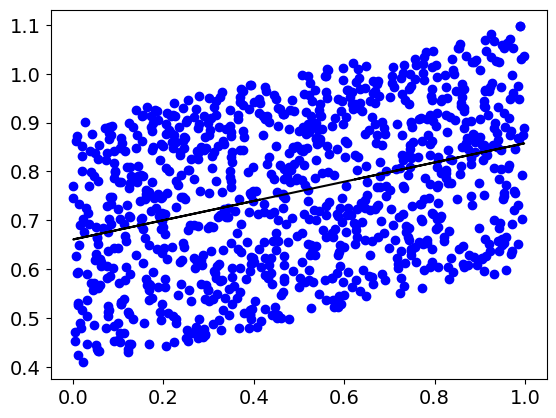

In [ ]:
lin_reg = LinearRegression()
X_c = x_training.reshape(num_s,1)
noise_c = noise.reshape(num_s,1)
y_c = 0.2*X_c+0.4+noise_c
start = time.time()
lin_reg.fit(X_c, y_c)
dt = time.time() - start;
print('Upłynęło ',dt*1000,' ms')
print(lin_reg.intercept_, lin_reg.coef_)
plt.plot(X_c, y_c, "bo") # dane treningowe
plt.plot(X_c, lin_reg.intercept_+lin_reg.coef_*X_c, "k")
plt.show()